In [53]:
import numpy as np
import pandas as pd
from sklearn.linear_model import LogisticRegression
LogisticRegressionCV
from sklearn.model_selection import train_test_split
import statsmodels.api as sm
from mord import LogisticIT
import matplotlib.pylab as plt
import seaborn as sns
from dmba import classificationSummary
gainsChart 
liftChart
from dmba.metric import AIC_score


NameError: name 'LogisticRegressionCV' is not defined

In [54]:
# load the data
import dmba
ebay_df = dmba.load_data('ebayAuctions.csv')
ebay_df.columns

Index(['Category', 'currency', 'sellerRating', 'Duration', 'endDay',
       'ClosePrice', 'OpenPrice', 'Competitive?'],
      dtype='object')

In [55]:
#prettify variable names
ebay_df.columns = [c.replace('?', '') for c in ebay_df.columns]
ebay_df.columns

Index(['Category', 'currency', 'sellerRating', 'Duration', 'endDay',
       'ClosePrice', 'OpenPrice', 'Competitive'],
      dtype='object')

In [56]:
# check the variable types
ebay_df.dtypes

Category         object
currency         object
sellerRating      int64
Duration          int64
endDay           object
ClosePrice      float64
OpenPrice       float64
Competitive       int64
dtype: object

In [57]:
# pivot table of Competitive and Category
pivot1 = pd.pivot_table(ebay_df, index= 'Category', values= "Competitive",
                       aggfunc= [np.mean])
pivot1


,mean
,Competitive
Category,
Antique/Art/Craft,0.564972
Automotive,0.353933
Books,0.500000
Business/Industrial,0.666667
Clothing/Accessories,0.504202
Coins/Stamps,0.297297
Collectibles,0.577406
Computer,0.666667


In [58]:
# pivot table of Competitive and Category
pivot2 = pd.pivot_table(ebay_df, index= 'currency', values="Competitive",
                       aggfunc= [np.mean])
pivot2

,mean
,Competitive
currency,
EUR,0.551595
GBP,0.687075
US,0.519350


In [59]:
# pivot table of Competitive and Category
pivot3 = pd.pivot_table(ebay_df, index= 'endDay', values= "Competitive",
                       aggfunc= [np.mean])
pivot3

,mean
,Competitive
endDay,
Fri,0.466899
Mon,0.673358
Sat,0.427350
Sun,0.485207
Thu,0.603960
Tue,0.532164
Wed,0.480000


In [60]:
ebay_df.loc[ebay_df.endDay == 'Sun', 'endDay'] = 'Sun_Fri'
ebay_df.loc[ebay_df.endDay == 'Fri', 'endDay'] = 'Sun_Fri'

ebay_df.loc[ebay_df.Category == "Business/Industrial", 'Category'] = 'Computer'
ebay_df.loc[ebay_df.Category == "Antique/Art/Craft", 'Category'] = 'Collectibles'

In [61]:
# pivot table of Competitive and Category
pivot1 = pd.pivot_table(ebay_df, index= 'Category', values= "Competitive",
                       aggfunc= [np.mean])
pivot1

,mean
,Competitive
Category,
Automotive,0.353933
Books,0.500000
Clothing/Accessories,0.504202
Coins/Stamps,0.297297
Collectibles,0.572115
Computer,0.666667
Electronics,0.800000
EverythingElse,0.235294


In [62]:
# pivot table of Competitive and Category
pivot3 = pd.pivot_table(ebay_df, index= 'endDay', values= "Competitive",
                       aggfunc= [np.mean])
pivot3

,mean
,Competitive
endDay,
Mon,0.673358
Sat,0.427350
Sun_Fri,0.476800
Thu,0.603960
Tue,0.532164
Wed,0.480000


In [63]:
#change variable types to appropriate ones
ebay_df['Category'] = ebay_df['Category'].astype('category')
ebay_df['currency'] = ebay_df['currency'].astype('category')
ebay_df['endDay'] = ebay_df['endDay'].astype('category')

#convert categorical variables into indicator and drop the first column of each of them
ebay_df = pd.get_dummies(ebay_df, prefix_sep='_')
ebay_df.drop(columns=['Category_Automotive', 'currency_EUR', 'endDay_Mon'], inplace=True)

In [64]:
#predictor and response variables
ebay_df['Competitive'] = ebay_df['Competitive'].astype('category')
outcome = 'Competitive'
predictors = list(ebay_df.columns)
predictors.remove(outcome)
y = ebay_df[outcome]
X = ebay_df[predictors]

In [65]:
from sklearn.model_selection import train_test_split
# split the data into training and validation sets
X_train, X_valid, y_train, y_valid = train_test_split(X, y, test_size=0.40, random_state=202)

In [71]:
# fit a logistic regression (set penalty=l2 and C=1e42 to avoid regularization)
logit_reg = LogisticRegression(penalty="l2", C=1e42, solver='liblinear')
classes = list(y.cat.categories)
logit_reg.fit(X_train, y_train)

LogisticRegression(C=1e+42, solver='liblinear')

In [73]:
# print coefficients
# print intercept
print('Intercept:', logit_reg.intercept_[0])

# print coefficients for each feature
coefficients_df = pd.DataFrame({'coeff': logit_reg.coef_[0]}, index=X.columns)
print(coefficients_df)

Intercept: -0.16192763384755826
                                  coeff
sellerRating                  -0.000037
Duration                      -0.009849
ClosePrice                     0.084255
OpenPrice                     -0.098236
Category_Books                -0.027917
Category_Clothing/Accessories -0.523625
Category_Coins/Stamps         -0.962890
Category_Collectibles          0.430727
Category_Computer              0.501427
Category_Electronics           1.164481
Category_EverythingElse       -1.507140
Category_Health/Beauty        -1.501507
Category_Home/Garden           0.374514
Category_Jewelry              -0.069445
Category_Music/Movie/Game      0.778651
Category_Photography           0.354568
Category_Pottery/Glass        -0.169719
Category_SportingGoods         0.482369
Category_Toys/Hobbies          0.708471
currency_GBP                   1.173496
currency_US                    0.304626
endDay_Sat                    -1.052249
endDay_Sun_Fri                -0.709733
endDay_T

In [76]:
# confusion matrix
from dmba import classificationSummary
# predicted y for validation
val_pred = logit_reg.predict(X_valid)
#confusion matrix
classificationSummary(y_valid, val_pred, class_names=classes)

Confusion Matrix (Accuracy 0.7592)

       Prediction
Actual   0   1
     0 289  74
     1 116 310


In [77]:
# drop the predictor 'ClosePrice'
X_train = X_train.drop(columns=['ClosePrice'])
X_valid = X_valid.drop(columns=['ClosePrice'])

In [78]:
# fit a logistic regression (set penalty="l2" and C=1e42 to avoid regularization)
logit_reg = LogisticRegression(penalty="l2", C=1e42, solver='liblinear')
logit_reg.fit(X_train, y_train)

LogisticRegression(C=1e+42, solver='liblinear')

In [81]:
# Print intercept and coefficients
print('Intercept:', logit_reg.intercept_[0])
coefficients_df = pd.DataFrame({'Feature': X_train.columns, 'Coefficient': logit_reg.coef_[0]})
print(coefficients_df)


Intercept: 1.2489962957946674
                          Feature  Coefficient
0                    sellerRating    -0.000040
1                        Duration    -0.081672
2                       OpenPrice    -0.007024
3                  Category_Books    -0.171425
4   Category_Clothing/Accessories     0.321036
5           Category_Coins/Stamps    -0.862590
6           Category_Collectibles     0.456241
7               Category_Computer     0.993811
8            Category_Electronics     1.538032
9         Category_EverythingElse    -1.663717
10         Category_Health/Beauty    -1.764911
11           Category_Home/Garden     0.633313
12               Category_Jewelry    -0.311844
13      Category_Music/Movie/Game     0.515804
14           Category_Photography     1.130907
15         Category_Pottery/Glass    -0.322784
16         Category_SportingGoods     1.382113
17          Category_Toys/Hobbies     0.665081
18                   currency_GBP     1.015555
19                    currency

In [84]:
# confusion matrix
# predicted y for validation set
from sklearn.metrics import accuracy_score
val_pred = logit_reg.predict(X_valid)
# Confusioin matrix
classificationSummary(y_valid, val_pred, class_names=classes)

#keep track of results
accuracies = {}
accuracies ['full model'] = [accuracy_score(y_train, logit_reg.predict(X_train)), accuracy_score(y_valid, val_pred)]

Confusion Matrix (Accuracy 0.6324)

       Prediction
Actual   0   1
     0 213 150
     1 140 286


In [87]:
# odds coefficient for close price
import math
math.exp(.084255)

1.0879062745412877

In [93]:
from dmba import backward_elimination, forward_selection, stepwise_selection
def train_model(variables):
    if len(variables) == 0:
        return None
    model = LogisticRegression(penalty="l2", C=1e42, solver='liblinear')
    
    model.fit(X_train[list(variables)], y_train)
    return model

def score_model(model, variables):
    if len(variables) == 0:
        return 0
    y_pred = model.predict(X_train[list(variables)])
    #we negate as score is optimized to be as low as possible
    return -accuracy_score(y_train, y_pred)

allVariables = X_train.columns
best_fitting, var_fitting = stepwise_selection(allVariables, train_model,
                                              score_model, verbose=True)
print(sorted(var_fitting))

#confusion matrix
y_pred = best_fitting.predict(X_valid[list(var_fitting)])
classificationSummary(y_valid, y_pred, class_names=classes)

accuracies['best fitting'] = [accuracy_score(y_train, best_fitting.predict(X_train[list(var_fitting)])),
                             accuracy_score(y_valid, y_pred)]


Variables: sellerRating, Duration, OpenPrice, Category_Books, Category_Clothing/Accessories, Category_Coins/Stamps, Category_Collectibles, Category_Computer, Category_Electronics, Category_EverythingElse, Category_Health/Beauty, Category_Home/Garden, Category_Jewelry, Category_Music/Movie/Game, Category_Photography, Category_Pottery/Glass, Category_SportingGoods, Category_Toys/Hobbies, currency_GBP, currency_US, endDay_Sat, endDay_Sun_Fri, endDay_Thu, endDay_Tue, endDay_Wed
Start: score=0.00, constant
Step: score=-0.57, add endDay_Sat
Step: score=-0.60, add endDay_Sun_Fri
Step: score=-0.61, add Category_Electronics
Step: score=-0.62, add Category_Toys/Hobbies
Step: score=-0.63, add Category_Jewelry
Step: score=-0.63, add Category_Computer
Step: score=-0.64, add Category_Health/Beauty
Step: score=-0.67, add OpenPrice
Step: score=-0.67, add endDay_Tue
Step: score=-0.67, add endDay_Wed
Step: score=-0.67, add currency_GBP
Step: score=-0.67, unchanged None
['Category_Computer', 'Category_El

In [95]:
def score_model(model, variables):
    if len(variables) == 0:
        return 0
    y_pred = model.predict(X_valid[list(variables)])
    # we negate as score is optimized to be as low as possible
    return -accuracy_score(y_valid, y_pred)

allVariables = X_train.columns
best_predictive, var_predictive = stepwise_selection(allVariables, train_model,
                                                    score_model, verbose=True)
print(sorted(var_predictive))

#confusion matrix
y_pred = best_predictive.predict(X_valid[list(var_predictive)])
classificationSummary(y_valid, y_pred, class_names=classes)

accuracies['best predictive'] = [accuracy_score(y_train, best_predictive.predict(X_train[var_predictive])),
                                accuracy_score(y_valid, y_pred)]
    


Variables: sellerRating, Duration, OpenPrice, Category_Books, Category_Clothing/Accessories, Category_Coins/Stamps, Category_Collectibles, Category_Computer, Category_Electronics, Category_EverythingElse, Category_Health/Beauty, Category_Home/Garden, Category_Jewelry, Category_Music/Movie/Game, Category_Photography, Category_Pottery/Glass, Category_SportingGoods, Category_Toys/Hobbies, currency_GBP, currency_US, endDay_Sat, endDay_Sun_Fri, endDay_Thu, endDay_Tue, endDay_Wed
Start: score=0.00, constant
Step: score=-0.57, add OpenPrice
Step: score=-0.58, add Category_Music/Movie/Game
Step: score=-0.60, add Category_SportingGoods
Step: score=-0.63, add Category_Electronics
Step: score=-0.64, add sellerRating
Step: score=-0.65, add endDay_Wed
Step: score=-0.65, add Category_Coins/Stamps
Step: score=-0.65, add Category_Photography
Step: score=-0.65, unchanged None
['Category_Coins/Stamps', 'Category_Electronics', 'Category_Music/Movie/Game', 'Category_Photography', 'Category_SportingGoods',

In [96]:
pd.DataFrame(accuracies, index=['training', 'validation']).transpose()

,training,validation
full model,0.655959,0.632446
best fitting,0.673711,0.608365
best predictive,0.634827,0.652725


In [99]:
from sklearn.linear_model import LogisticRegression, LogisticRegressionCV
logit_reg_L1 = LogisticRegressionCV(cv=5, random_state=0, Cs=20, max_iter=500)
logit_reg_L1.fit(X_train, y_train)

#confusion matrix
classificationSummary(logit_reg_L1.predict(X_valid), val_pred, class_names=classes)

accuracies['regularized'] = [accuracy_score(y_train, logit_reg_L1.predict(X_train)),
                            accuracy_score(y_valid, logit_reg_L1.predict(X_valid))]

Confusion Matrix (Accuracy 0.7681)

       Prediction
Actual   0   1
     0 198  28
     1 155 408


In [100]:
pd.DataFrame(accuracies, index=['training', 'validation']).transpose()

,training,validation
full model,0.655959,0.632446
best fitting,0.673711,0.608365
best predictive,0.634827,0.652725
regularized,0.622992,0.583016


<Axes: xlabel='Cs'>

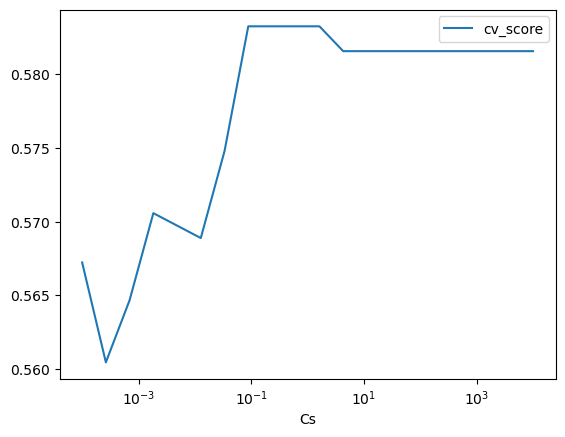

In [102]:
cv_result = pd.DataFrame({
    'Cs': logit_reg_L1.Cs_,
    'cv_score': np.mean(logit_reg_L1.scores_[1], axis=0),
    
})
cv_result.plot.line(x='Cs', y='cv_score', logx=True)

In [104]:
# print coefficients
print('intercept ', logit_reg.intercept_[0])
coefficients = pd.DataFrame({
         'unregularized': logit_reg.coef_[0],
         'best_fitting': 0,
         'best_predictive':0,
         'L1 regularized': logit_reg_L1.coef_[0]
          }, index=X_train.columns)
coefficients.loc[var_fitting, 'best_fitting'] = best_fitting.coef_.ravel()
coefficients.loc[var_predictive, 'best_predictive'] = best_predictive.coef_.ravel()
coefficients

intercept  1.2489962957946674


,unregularized,best_fitting,best_predictive,L1 regularized
sellerRating,-0.000040,0.000000,-0.000023,-0.000006
Duration,-0.081672,0.000000,0.000000,-0.045518
OpenPrice,-0.007024,-0.009027,-0.009340,-0.008252
Category_Books,-0.171425,0.000000,0.000000,-0.073925
Category_Clothing/Accessories,0.321036,0.000000,0.000000,-0.030697
Category_Coins/Stamps,-0.862590,0.000000,-0.393639,-0.033535
Category_Collectibles,0.456241,0.000000,0.000000,0.034916
Category_Computer,0.993811,0.658444,0.000000,0.061361
Category_Electronics,1.538032,1.223071,1.262648,0.146363
Category_EverythingElse,-1.663717,0.000000,0.000000,-0.045057


,cutoff,accuracy
533,0.533,0.599493
534,0.534,0.600760
535,0.535,0.595691


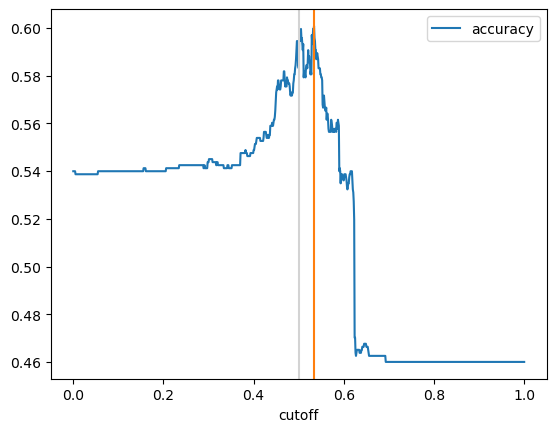

In [115]:
# Determine accuracy for different cutoff values between 0 and 1
data = []
for cutoff in [v / 1000 for v in range(1001)]:
    data.append({'cutoff': cutoff,
                'accuracy': accuracy_score(y_valid, logit_reg_L1.predict_proba(X_valid)[:, 1] > cutoff)})
data = pd.DataFrame(data)

maxAccuracyAt = data.iloc[data['accuracy'].argmax(), 0]

ax = data.plot.line(x='cutoff', y='accuracy')
ax.axvline(x=0.5, color='lightgrey')
ax.axvline(x=maxAccuracyAt, color='C1')

data.iloc[data['accuracy'].argmax() - 1:data['accuracy'].argmax() + 2, :]